# Import Packages


In [89]:
import numpy as np
import matplotlib.pyplot as plt

from sc_functions import *
from strprf import *

%reload_ext autoreload
%autoreload 2

# Calculating Manupilability

In [90]:
x = 100
n = 11
m = 4
d = 3

scfs = [plurality, borda, instant_runoff, pareto, omninomination, copeland, top_cycle, uncovered_set]
exts = [kelly, fishburn, gardenförs, optimist, pessimist, singleton]
profiles = [generate_profile(n, m) for _ in range(x)]
counts = [[manipulable_count(profiles, scf, ext) for scf in scfs] for ext in exts]

# Plotting Results

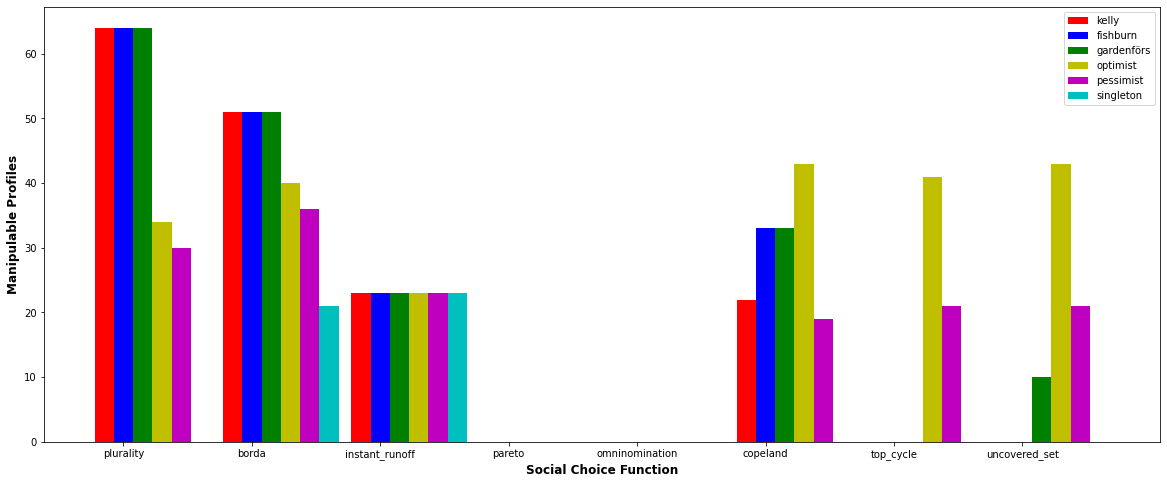

In [91]:
width = 0.15
colors = ['r', 'b', 'g', 'y', 'm', 'c']
X = np.arange(len(scfs))
fig = plt.subplots(figsize =(20, 8))
for i in range(len(exts)):
    plt.bar(X + width * i, counts[i], color = colors[i % len(colors)], width = width, label = str(exts[i])[10:-23])
plt.xlabel('Social Choice Function', fontweight ='bold', fontsize = 12)
plt.ylabel('Manipulable Profiles', fontweight ='bold', fontsize = 12)
plt.xticks([r + width for r in range(len(scfs))], [str(scf)[10:-23] for scf in scfs])
plt.legend()
plt.show()